# Ejercicio 3 -   Regresión Lineal con Keras

En este ejercicio, tu objetivo será entrenar modelos de Regresión Lineal utilizando Keras (y Tensorflow como backend) para familiarizarte con la librería y comprender la relación de sus clases y métodos con los que definimos en los ejercicios 1 y 2.



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import utils

# Creando modelos de regresión y prediciendo valores

El siguiente codigo crea modelos de Keras con distintos valores de `w` y `b` y verifica su salida.

Para crear un modelo de Keras utilizamos la clase `Sequential`, que permite utilizar modelos de varias capas. No obstante, en este caso vamos a crear modelos con una sola capa, la capa de clase `Dense` (también conocida como `fully connected` o `lineal`), que permite hacer regresión lineal con varias variables de entrada y de salida. 

Al crear la capa, especificamos la dimensionalidad de salida (1 en este caso) y la de entrada (2 en este caso). De esta forma el modelo puede crear e inicializar los parámetros `W` y `b`.

Como estamos probando un modelo puramente lineal, especificamos `activation=None` para que Keras no agregue ninguna función no-lineal a la salida.

Por último, utilizamos los parámetros por nombre `kernel_initializer` y `bias_initializer` de la clase `Dense` para especificar como inicializar los parámetros `w` (kernel) y `b` (bias) respectivamente. En este caso, utilizamos `keras.initializers.Constant` para inicializarlo con algunos valores constantes.

Ejecuta el siguiente bloque para verificar que en las 4 pruebas la función `predict` de los modelos de Keras hace lo mismo que la función `forward` vista anteriormente. En cada una de las pruebas, estamos inicializando el modelo con distintos valores de `w` y `b`.

In [10]:
import tensorflow as tf
import keras
import numpy as np

In [3]:
x=np.array([[1.0,2.0]
            ,[2.0,3.0]
            ,[3.0,4.0]])
print(x.shape)

(3, 2)


In [4]:
dimensionalidad_salida=1

In [8]:
dimensionalidad_entrada=(2,)

In [11]:
# PRUEBA 1
# Defino un modelo con w=(0,0) y b=0
model1 = keras.Sequential([
    keras.layers.Dense(
        dimensionalidad_salida,
        # dimensionalidad de la entrada
        input_shape=dimensionalidad_entrada,
        # activation=None para que no tenga f de activacion (r lineal)
        activation=None ,
        # inicializo w=(0,0)
        kernel_initializer = keras.initializers.Constant(value=0),
        # inicializo b=0
        bias_initializer = keras.initializers.Constant(value=0)
    )
])

In [12]:
y_prediccion = model1.predict(x)
y=np.zeros((3,1))
utils.verificar_igualdad(y,y_prediccion)




Los vectores x e y son iguales:
x:  [[0.]
 [0.]
 [0.]]
y:  [[0.]
 [0.]
 [0.]]


In [18]:
# PRUEBA 2
# Defino un modelo con w=(1,1) y b=0
model2 = keras.Sequential([
    keras.layers.Dense(
        dimensionalidad_salida,
        input_shape=dimensionalidad_entrada,
        activation=None,
        kernel_initializer = keras.initializers.Constant(value=1),
        bias_initializer   = keras.initializers.Constant(value=0)
    )
])

In [19]:
y_prediccion = model2.predict(x)
y=np.array([[3.0,5.0,7.0]]).T
utils.verificar_igualdad(y,y_prediccion)

Los vectores x e y son iguales:
x:  [[3.]
 [5.]
 [7.]]
y:  [[3.]
 [5.]
 [7.]]


In [22]:
# PRUEBA 3
# Defino un modelo con w=(0,0) y b=1
model3 = keras.Sequential([
    keras.layers.Dense(
        dimensionalidad_salida,
        input_shape=dimensionalidad_entrada,
        activation=None,
        kernel_initializer = keras.initializers.Constant(value=0),
        bias_initializer   = keras.initializers.Constant(value=1)
    )
])

In [23]:
y=np.ones((3,1))
y_prediccion = model3.predict(x)
utils.verificar_igualdad(y,y_prediccion)

Los vectores x e y son iguales:
x:  [[1.]
 [1.]
 [1.]]
y:  [[1.]
 [1.]
 [1.]]


In [24]:
# PRUEBA 4
# Defino un modelo con w=(1,1) y b=1
model4 = keras.Sequential([
    keras.layers.Dense(
        dimensionalidad_salida,
        input_shape=dimensionalidad_entrada,
        activation=None,
        kernel_initializer = keras.initializers.Constant(value=1),
        bias_initializer   = keras.initializers.Constant(value=1)
    )
])

In [36]:
y_prediccion = model4.predict(x)
y=np.array([[4.0,6.0,8.0]]).T
utils.verificar_igualdad(y,y_prediccion)

Los vectores x e y son iguales:
x:  [[4.]
 [6.]
 [8.]]
y:  [[4.]
 [6.]
 [8.]]


In [34]:
models = [model1, model2, model3, model4]

# Entrena un modelo de Regresión Lineal con Keras para el dataset de estudio 2D

El siguiente código carga un dataset de prueba con 2 dimensiones de entrada y una de salida.

Luego crea un modelo de regresión lineal con Keras, y visualiza sus pesos iniciales. 

Es importante notar tres cosas:

1. La métrica utilizada es `'mse'`, es decir el error cuadrático medio o promedio. Esta es la misma métrica vista en la teoría de Regresión Lineal.

2. El optimizador es una clase que define el algoritmo para minimizar el error cuadrático. En general, son todas variantes de descenso de gradiente. En este caso, estamos utilizando descenso de gradiente estocástico (`keras.optimizers.SGD`), que es igual al descenso de gradiente pero realiza cada actualización de los parámetros con un subconjunto de los ejemplos del dataset. 

3. El método para entrenar el modelo es `fit`. En este caso, el parámetro `lr` lo recibe el optimizador, pero `fit` recibe la cantidad de iteraciones (`epochs`) y el tamaño del batch para el SGD (`batch_size`).


Al finalizar el entrenamiento, observá los valores del vector de pesos `w`. ¿A qué atributo o variable de entrada le da más importancia el modelo?

In [55]:
# Carga del dataset
import os
dataset_path=os.path.join("datasets_simples","study_regression_2d_small.csv")
data=np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
x,y=data[:,0:2],data[:,2:3]
n,d_in=x.shape
n,d_out=y.shape
# print(x)
# print(y)
print(f"dimensionalidad salida {d_out}")
print(f"dimensionalidad entrada {d_in}")
print(f"ejemplos: {n}")
print("columnas: [estudio, promedio]")

dimensionalidad salida 1
dimensionalidad entrada 2
ejemplos: 19
columnas: [estudio, promedio]


In [118]:
# Creación del modelo inicial
print("Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados")
# Creo un modelo lineal
capa1 = keras.layers.Dense(d_out,input_shape=(d_in,), activation=None)
modelo = keras.Sequential([capa1])

Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados


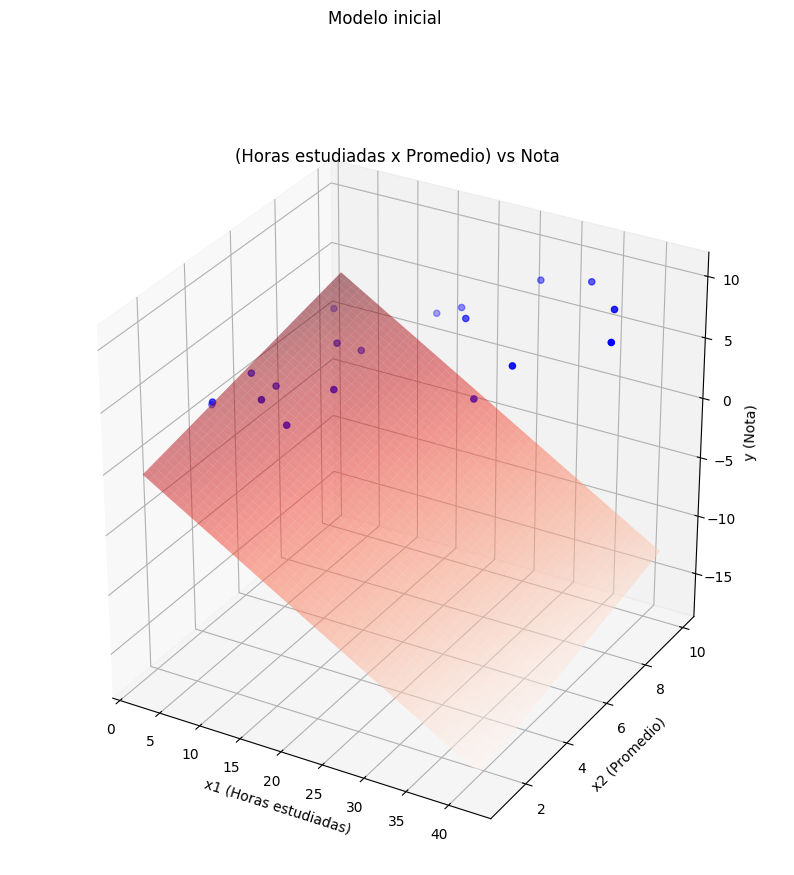

In [119]:
# visualización del modelo inicial
mensaje=f"Modelo inicial"
w,b=modelo.get_weights()
utils.plot_regresion_lineal(w,b,x,y,title=mensaje)

In [120]:
print(w,b)

[[-0.41226625]
 [ 0.46871042]] [0.]


In [121]:
#Creo el optimizador y compilo el modelo para usarlo
alpha=0.001 #lr
# Optimizador de descenso de gradiente estocástico 
sgd = keras.optimizers.SGD(lr=alpha)
# error cuadrático medio es la métrica de error a optimizar
error_metric='mse' # IMPORTANTE

In [122]:
modelo.compile(
  optimizer=sgd, 
  loss=error_metric, 
  metrics=["mse"], # metricas para ir calculando en cada iteracion o batch (ninguna ahora)
)

In [123]:
# Entrenamiento del modelo
history = modelo.fit(x, y, epochs=100, batch_size=10, validation_split=0.33)

Train on 12 samples, validate on 7 samples
Epoch 1/100
12/12 [==============================] - 0s 19ms/step - loss: 52.9447 - mean_squared_error: 52.9447 - val_loss: 26.4629 - val_mean_squared_error: 26.4629
Epoch 2/100
12/12 [==============================] - 0s 345us/step - loss: 4.6386 - mean_squared_error: 4.6386 - val_loss: 3.7330 - val_mean_squared_error: 3.7330
Epoch 3/100
12/12 [==============================] - 0s 499us/step - loss: 1.3344 - mean_squared_error: 1.3344 - val_loss: 0.4421 - val_mean_squared_error: 0.4421
Epoch 4/100
12/12 [==============================] - 0s 712us/step - loss: 0.9216 - mean_squared_error: 0.9216 - val_loss: 0.3600 - val_mean_squared_error: 0.3600
Epoch 5/100
12/12 [==============================] - 0s 976us/step - loss: 0.9282 - mean_squared_error: 0.9282 - val_loss: 0.4933 - val_mean_squared_error: 0.4933
Epoch 6/100
12/12 [==============================] - 0s 525us/step - loss: 0.9431 - mean_squared_error: 0.9431 - val_loss: 0.5825 - val_mea

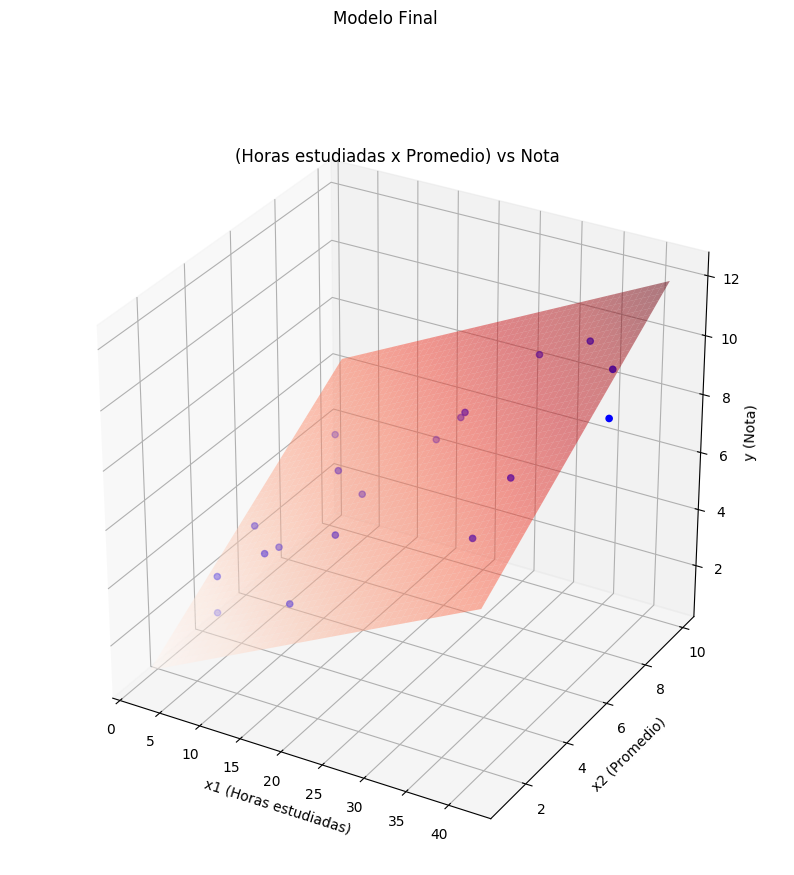

In [124]:
# visualiza el modelo y los datos
w,b=modelo.get_weights()
utils.plot_regresion_lineal(w,b,x,y,title="Modelo Final")

In [125]:
w, b

(array([[0.13955244],
        [0.60789186]], dtype=float32), array([0.07470667], dtype=float32))

In [126]:
# le dio más importancia a la 2da variable (columna) . Promedio.
history.history.keys()

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])

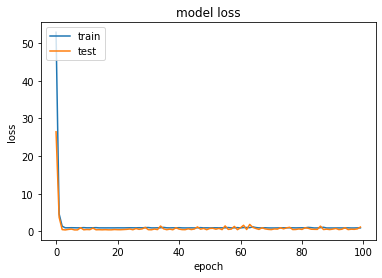

In [127]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()